In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestRegressor for regression
from sklearn.metrics import accuracy_score, classification_report

Running Random Forest Cross Validation On Minji's 5-Fold Split w/o Outliers

In [66]:
from sklearn.model_selection import cross_val_score, PredefinedSplit

In [39]:
#loading datasets
splitdf =  pd.read_csv("../RData/metadata_randomGroup.csv")
df = pd.read_csv("../RData/NoOutlier_filtered_normalized.csv")
print(df.shape)
#splitdf.head()

(763, 2003)


In [40]:
#merging splitdf with gene expression df
fulldf = pd.merge(df, splitdf[['Group', 'mRNA']], on="mRNA", how='left')
fulldf.set_index("mRNA", inplace=True)
fulldf.head()

,ENSG00000110484,ENSG00000173467,ENSG00000160180,ENSG00000106541,ENSG00000086548,ENSG00000186081,ENSG00000164128,ENSG00000082175,ENSG00000012223,ENSG00000151892,...,ENSG00000083444,ENSG00000077238,ENSG00000131378,ENSG00000162627,ENSG00000172428,ENSG00000090238,ENSG00000121310,ER,PAM50,Group
mRNA,,,,,,,,,,,,,,,,,,,,,
TCGA-B6-A0IG-01A-11R-A034-07,16.604568,13.223057,16.503468,16.406028,16.432548,12.923043,6.321402,10.431743,12.610098,15.059847,...,13.235186,12.394746,9.942146,8.553333,11.502764,10.531759,10.892306,Positive,LumA,2
TCGA-BH-A0HQ-01A-11R-A034-07,17.999684,12.796037,15.401028,15.135256,10.963789,13.592751,9.657230,13.523402,13.761161,15.761459,...,13.502874,12.193215,11.164268,10.274965,10.937427,11.517999,12.172644,NaN,LumA,6
TCGA-BH-A18G-01A-11R-A12D-07,11.449702,3.660178,0.000000,5.166983,10.137522,10.144959,14.228891,5.449170,18.585784,8.618219,...,15.340948,12.148326,10.899602,10.838234,11.463646,12.285856,10.922859,Negative,Basal,2
TCGA-A8-A09K-01A-11R-A00Z-07,1.675843,13.126475,10.825054,12.800465,4.375425,7.437230,11.509252,9.890669,9.995210,16.164904,...,11.836395,9.202800,9.810061,10.297798,11.573526,12.778097,12.220035,Positive,LumA,5
TCGA-BH-A0BZ-01A-31R-A12P-07,8.222050,11.830127,12.560654,14.547573,9.016715,11.662777,9.213446,7.501901,7.631275,14.109405,...,13.686927,12.581818,11.524712,9.752092,10.692426,11.690135,10.532674,Positive,LumB,2


In [41]:
#Saving Missing Values
MissingValues = fulldf[fulldf["Group"] == 6]
CleanMissingValues = MissingValues.drop(columns=["PAM50", "ER", "Group"])

In [42]:
#Removing all missing values from dataframe
fulldf = fulldf[fulldf["Group"] != 6]
fulldf.shape

(652, 2003)

In [49]:
#Making the group column zero index
fulldf["Group"] = fulldf["Group"] - 1

In [45]:
#Setting up X and y
X5 = fulldf.drop(columns=["PAM50","ER","Group"]) 
y5 = fulldf["ER"] 

In [50]:
#Splitting data and setting up predefined split
group_indices = fulldf['Group'].values  
ps = PredefinedSplit(group_indices)


In [52]:
#Running RF Cross-Validation
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf, X5, y5, cv=ps, scoring='accuracy')

# Print results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.94202899 0.96666667 0.93478261 0.94927536 0.94915254]
Mean accuracy: 0.9483812331122575


In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


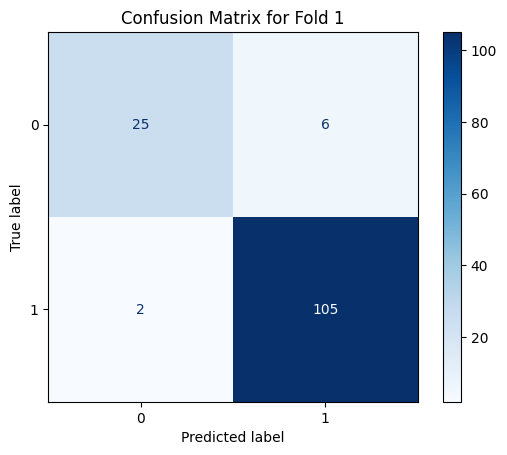

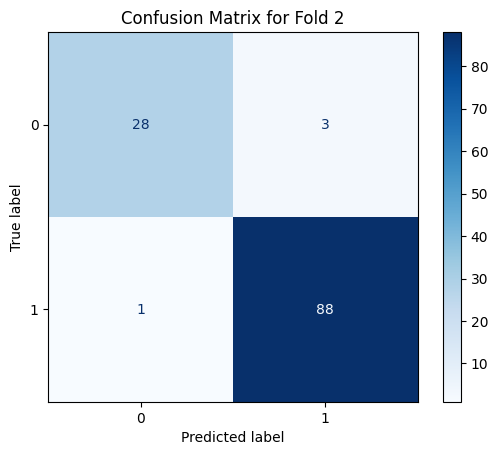

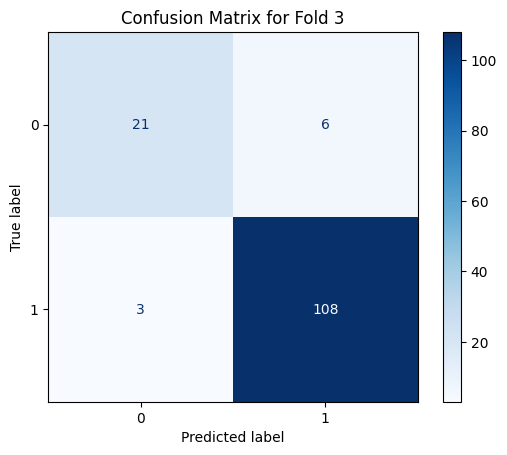

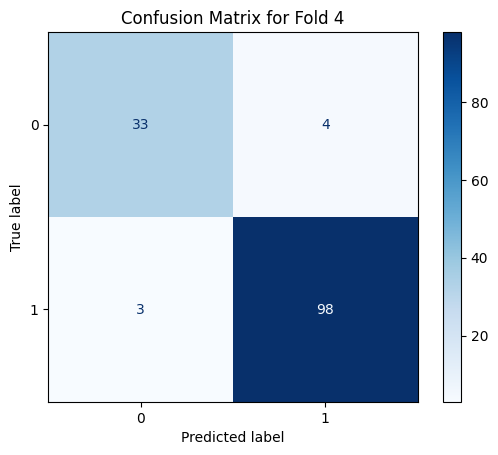

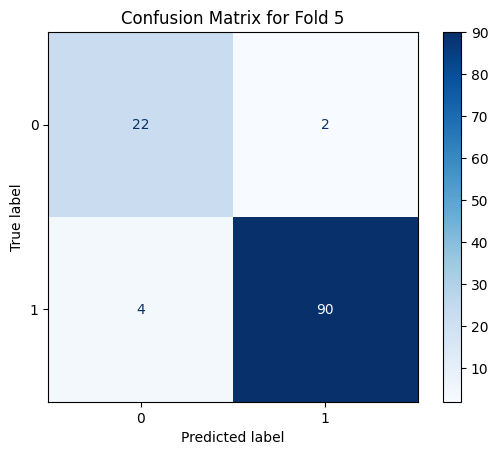

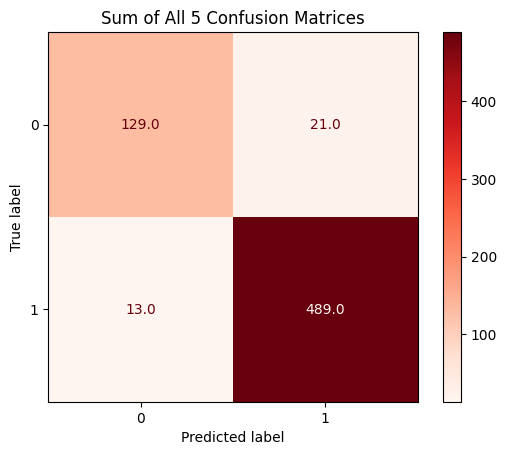

In [54]:
#Creating Confusion Matrix
X = np.array(X5)
y = np.array(y5)
z = np.zeros((2,2))
for fold_idx, (train_idx, test_idx) in enumerate(ps.split(), 1):
    # Split data into train and test
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the model
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred).astype(int)
    z = z + cm

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for Fold {fold_idx}")
    plt.show()
disp = ConfusionMatrixDisplay(confusion_matrix=z)
disp.plot(cmap="Reds", values_format = "")
plt.title(f"Sum of All 5 Confusion Matrices")
plt.show()

Fitting the Final Model (One without outliers on the filtered gene expression data) and Predicting all Missing ER Values

In [55]:
#Fitting Final Model
rf.fit(X5, y5)

RandomForestClassifier(random_state=42)

In [56]:
#Predicting all Missing Values
missingvalpred = rf.predict(CleanMissingValues)

In [63]:
test_predicted = pd.DataFrame(missingvalpred, columns=["ER_RF"])
test_predicted["mRNA"] = CleanMissingValues.index

In [64]:
test_predicted

,ER_RF,mRNA
0,Positive,TCGA-BH-A0HQ-01A-11R-A034-07
1,Positive,TCGA-A1-A0SD-01A-11R-A115-07
2,Positive,TCGA-A2-A0CQ-01A-21R-A034-07
3,Positive,TCGA-A2-A0CS-01A-11R-A115-07
4,Positive,TCGA-A2-A0YC-01A-11R-A109-07
...,...,...
106,Positive,TCGA-D8-A1XC-01A-11R-A14D-07
107,Positive,TCGA-E2-A14T-01A-11R-A115-07
108,Negative,TCGA-E2-A1LG-01A-21R-A14M-07
109,Positive,TCGA-E9-A54X-01A-11R-A266-07


In [70]:
import numpy as np#metadf['Group'] = metadf['ER'].apply(lambda x: 6 if pd.isna(x) else np.random.randint(1, 6))
csv_filename = "../RData/predicted_rf.csv"
test_predicted.to_csv(csv_filename, index=False)